In [9]:
!pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable


In [7]:
# Ensure inline plotting in Jupyter notebooks
%matplotlib inline
import math
import mpmath
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from ipywidgets import interact
from IPython.display import clear_output

# Function to compute sqrt(N) with specified decimal precision
def compute_sqrt(N, uptoDecimal):
    mpmath.mp.dps = uptoDecimal + 1  # Set decimal precision to one more than desired
    sqrt_N = mpmath.sqrt(N)
    sqrt_str = str(sqrt_N)  # Convert to string
    
    # Extract digits after decimal point
    decimal_part = sqrt_str.split('.')[1][:uptoDecimal]  
    return decimal_part

# Function to compute frequency statistics
def compute_frequency_stats(decimal_digits):
    digit_counts = Counter(decimal_digits)  # Count frequency of each digit
    digits = list(map(str, range(10)))  # Digits 0-9
    frequencies = np.array([digit_counts.get(d, 0) for d in digits])  # Frequency list (default 0 if missing)

    # Compute required statistics
    min_freq = np.min(frequencies)
    max_min_diff = np.max(frequencies) - min_freq  # Max-Min frequency difference
    std_dev = np.std(frequencies)  # Standard deviation
    expected_freq = np.mean(frequencies)  # Expected freq for chi-square
    chi_square = np.sum((frequencies - expected_freq) ** 2 / expected_freq)  # Chi-square test

    # Compute frequency difference from least frequent digit
    freq_diff = frequencies - min_freq

    return digits, freq_diff, std_dev, max_min_diff, chi_square

# Compute sqrt(2) up to 1M decimal places
N = math.pi  
uptoDecimal = 1000000  
decimal_digits = compute_sqrt(N, uptoDecimal)

# Lists to store data for Std Dev & Chi-Square over steps
steps = list(range(0, uptoDecimal + 1, 1000))  # Steps from 0 to 1M with step size 1000
std_dev_values = []
chi_square_values = []
max_min_diff_values = []

# Compute Std Dev & Chi-Square for each step
for length in steps:
    decimal_part = decimal_digits[:length]  
    _, _, std_dev, min_max_diff, chi_square = compute_frequency_stats(decimal_part)
    std_dev_values.append(std_dev)
    chi_square_values.append(chi_square)
    max_min_diff_values.append(min_max_diff)

# Function to update frequency difference plot via slider
def update_freq_diff(length):
    clear_output(wait=True)  # Clear previous output to refresh the plot
    
    decimal_part = decimal_digits[:length]  
    digits, freq_diff, std_dev, max_min_diff, chi_square = compute_frequency_stats(decimal_part)  

    # Print statistics
    print(f"Step: {length}")
    print(f"Standard Deviation: {std_dev:.3f}")
    print(f"Max-Min Frequency Difference: {max_min_diff}")
    print(f"Chi-Square Statistic: {chi_square:.3f}")
    
    # Plot frequency difference
    plt.figure(figsize=(7, 5))
    plt.bar(digits, freq_diff, color='lightcoral', edgecolor='black')
    plt.xlabel("Digits (0-9)")
    plt.ylabel("Frequency Difference (Freq - Least Freq)")
    plt.title(f"Digit Frequency Difference (Length: {length})")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Interactive slider for frequency difference
interact(update_freq_diff, length=(0, uptoDecimal, 5000))


/tmp/ipykernel_568/3721032254.py:32: RuntimeWarning: invalid value encountered in divide
  chi_square = np.sum((frequencies - expected_freq) ** 2 / expected_freq)  # Chi-square test


interactive(children=(IntSlider(value=500000, description='length', max=1000000, step=5000), Output()), _dom_c…

<function __main__.update_freq_diff(length)>

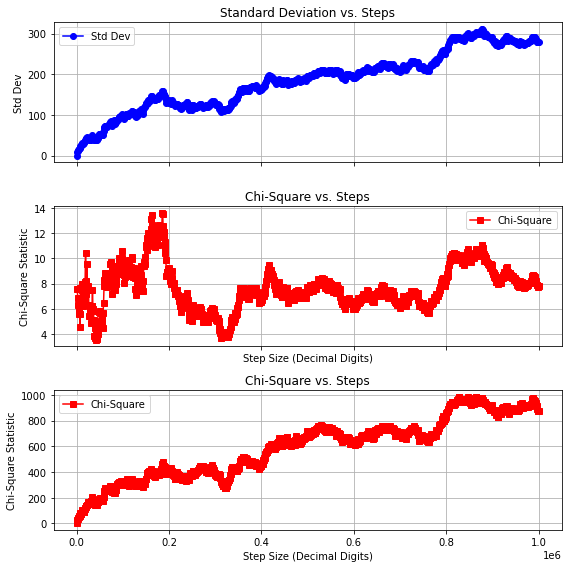

In [8]:
# Plot Std Dev & Chi-Square in separate panels
fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

# Plot Standard Deviation
axes[0].plot(steps, std_dev_values, marker='o', linestyle='-', color='blue', label="Std Dev")
axes[0].set_ylabel("Std Dev")
axes[0].set_title("Standard Deviation vs. Steps")
axes[0].legend()
axes[0].grid(True)

# Plot Chi-Square
axes[1].plot(steps, chi_square_values, marker='s', linestyle='-', color='red', label="Chi-Square")
axes[1].set_xlabel("Step Size (Decimal Digits)")
axes[1].set_ylabel("Chi-Square Statistic")
axes[1].set_title("Chi-Square vs. Steps")
axes[1].legend()
axes[1].grid(True)

# Plot Chi-Square
axes[2].plot(steps, max_min_diff_values, marker='s', linestyle='-', color='red', label="Chi-Square")
axes[2].set_xlabel("Step Size (Decimal Digits)")
axes[2].set_ylabel("Chi-Square Statistic")
axes[2].set_title("Chi-Square vs. Steps")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()  # Adjust spacing
plt.show()


In [55]:
import numpy as np
import mpmath
import pickle
from collections import Counter

# Function to compute sqrt(N) with high precision
def compute_sqrt(N, uptoDecimal):
    mpmath.mp.dps = uptoDecimal + 1  # Set precision
    sqrt_N = mpmath.sqrt(N)
    sqrt_str = str(sqrt_N)
    return sqrt_str.split('.')[1][:uptoDecimal]  # Extract decimal part

# Function to compute frequency statistics
def compute_frequency_stats(decimal_digits):
    digit_counts = Counter(decimal_digits)
    digits = list(map(str, range(10)))  # Digits 0-9
    frequencies = np.array([digit_counts.get(d, 0) for d in digits])  

    min_freq = np.min(frequencies)
    max_freq = np.max(frequencies)
    max_min_diff = max_freq - min_freq
    std_dev = np.std(frequencies)
    expected_freq = np.mean(frequencies)
    chi_square = np.sum((frequencies - expected_freq) ** 2 / expected_freq)

    return std_dev, chi_square, max_min_diff

# Parameters
N_values = [math.pi]
uptoDecimal = 1_000_000  # 1M digits
steps = list(range(0, uptoDecimal + 1, 1000))

# Data storage
std_dev_dict = {}
chi_square_dict = {}
max_min_diff_dict = {}
decimal_digits_dict = {}

for N in N_values:
    print(f"Computing √{N} up to 1M digits...")
    
    decimal_digits = compute_sqrt(N, uptoDecimal)  # Compute 1M digits
    decimal_digits_dict[N] = decimal_digits  # Save raw decimal data

    std_dev_list, chi_square_list, max_min_diff_list = [], [], []

    for length in steps:
        decimal_part = decimal_digits[:length]
        std_dev, chi_square, max_min_diff = compute_frequency_stats(decimal_part)
        std_dev_list.append(std_dev)
        chi_square_list.append(chi_square)
        max_min_diff_list.append(max_min_diff)
    
    std_dev_dict[N] = std_dev_list
    chi_square_dict[N] = chi_square_list
    max_min_diff_dict[N] = max_min_diff_list

# Save data to disk
np.save("std_dev.npy", std_dev_dict)
np.save("chi_square.npy", chi_square_dict)
np.save("max_min_diff.npy", max_min_diff_dict)

with open("decimal_digits.pkl", "wb") as f:
    pickle.dump(decimal_digits_dict, f)  # Save decimal digits as a compressed pickle file

print("Data saved successfully.")


Computing √2 up to 1M digits...


/tmp/ipykernel_2203/3910308688.py:24: RuntimeWarning: invalid value encountered in divide
  chi_square = np.sum((frequencies - expected_freq) ** 2 / expected_freq)


Computing √3 up to 1M digits...
Computing √5 up to 1M digits...
Computing √6 up to 1M digits...
Computing √7 up to 1M digits...
Computing √8 up to 1M digits...
Computing √10 up to 1M digits...
Computing √11 up to 1M digits...
Computing √12 up to 1M digits...
Computing √13 up to 1M digits...
Computing √14 up to 1M digits...
Computing √15 up to 1M digits...
Computing √17 up to 1M digits...
Data saved successfully.


In [10]:
import numpy as np
import pickle

# Load statistics
std_dev_dict = np.load("std_dev.npy", allow_pickle=True).item()
chi_square_dict = np.load("chi_square.npy", allow_pickle=True).item()
max_min_diff_dict = np.load("max_min_diff.npy", allow_pickle=True).item()

# Load decimal digits
with open("decimal_digits.pkl", "rb") as f:
    decimal_digits_dict = pickle.load(f)

print("Data loaded successfully.")


Data loaded successfully.


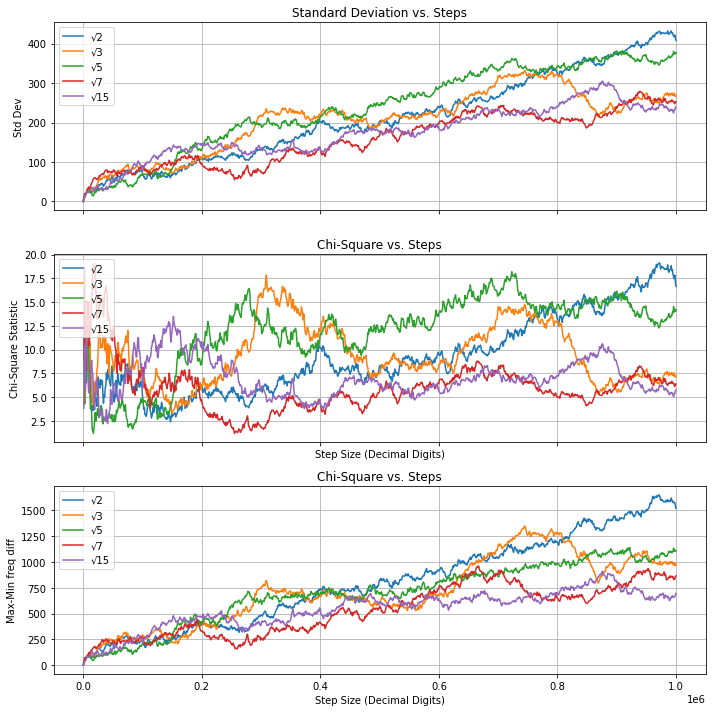

In [12]:
# Plot Std Dev & Chi-Square for all cases
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

N_values_plots = [2,3,5,7,15]

# Plot Standard Deviation
for N in N_values_plots:
    axes[0].plot(steps, std_dev_dict[N], label=f"√{N}")
axes[0].set_ylabel("Std Dev")
axes[0].set_title("Standard Deviation vs. Steps")
axes[0].legend()
axes[0].grid(True)

# Plot Chi-Square
for N in N_values_plots:
    axes[1].plot(steps, chi_square_dict[N], label=f"√{N}")
axes[1].set_xlabel("Step Size (Decimal Digits)")
axes[1].set_ylabel("Chi-Square Statistic")
axes[1].set_title("Chi-Square vs. Steps")
axes[1].legend()
axes[1].grid(True)

# plt.tight_layout()  # Adjust spacing
# plt.show()

# Plot Chi-Square
for N in N_values_plots:
    axes[2].plot(steps, max_min_diff_dict[N], label=f"√{N}")
axes[2].set_xlabel("Step Size (Decimal Digits)")
axes[2].set_ylabel("Max-Min freq diff")
axes[2].set_title("Chi-Square vs. Steps")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()  # Adjust spacing
plt.show()

